In [87]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import os
import csv
from sklearn.preprocessing import LabelEncoder
import scikitplot
from sklearn.model_selection import RandomizedSearchCV

In [19]:
os.listdir(nltk.data.find('corpora'))

['abc',
 'abc.zip',
 'alpino',
 'alpino.zip',
 'biocreative_ppi',
 'biocreative_ppi.zip',
 'brown',
 'brown.zip',
 'brown_tei',
 'brown_tei.zip',
 'cess_cat',
 'cess_cat.zip',
 'cess_esp',
 'cess_esp.zip',
 'chat80',
 'chat80.zip',
 'city_database',
 'city_database.zip',
 'cmudict',
 'cmudict.zip',
 'comparative_sentences',
 'comparative_sentences.zip',
 'comtrans.zip',
 'conll2000',
 'conll2000.zip',
 'conll2002',
 'conll2002.zip',
 'conll2007.zip',
 'crubadan',
 'crubadan.zip',
 'dependency_treebank',
 'dependency_treebank.zip',
 'dolch',
 'dolch.zip',
 'europarl_raw',
 'europarl_raw.zip',
 'floresta',
 'floresta.zip',
 'framenet_v15',
 'framenet_v15.zip',
 'framenet_v17',
 'framenet_v17.zip',
 'gazetteers',
 'gazetteers.zip',
 'genesis',
 'genesis.zip',
 'gutenberg',
 'gutenberg.zip',
 'ieer',
 'ieer.zip',
 'inaugural',
 'inaugural.zip',
 'indian',
 'indian.zip',
 'jeita.zip',
 'kimmo',
 'kimmo.zip',
 'knbc.zip',
 'lin_thesaurus',
 'lin_thesaurus.zip',
 'machado.zip',
 'mac_morpho',

In [9]:
movie_cat = movie_reviews.categories()

In [10]:
len(movie_cat)

2

In [20]:
movie_cat 

['neg', 'pos']

In [22]:
movie_reviews.abspaths()[0]

FileSystemPathPointer('C:\\Users\\Plaban_Nayak\\AppData\\Roaming\\nltk_data\\corpora\\movie_reviews\\neg\\cv000_29416.txt')

In [13]:
movie_review = movie_reviews.fileids(movie_cat[1])

In [15]:
movie_review_txt = movie_reviews.fileids()


In [29]:
for items in movie_review_txt:
    f = movie_reviews.open(items)
    sent = f.read()
    print(items[:3])
    print(sent)
    
    f.close()
    break

neg
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have n

In [31]:
header = ["Article","Review"]
count = 0
#include all the content of the movie_review corpus into a csv file with test as header Article and Moview _review
#as positive or negative reviews derived from first 3 charcters of the file name items[:3]
with open('Movie_review.csv', 'w', newline='') as f_output:
        csv_output = csv.writer(f_output)
        csv_output.writerow(header)
        files = []
        for items in movie_review_txt:
            f = movie_reviews.open(items)
            sent = f.readlines()
            csv_output.writerow([sent,items[:3]])
            f.close()
    

In [32]:
import pandas as pd
df_movie_reviews = pd.read_csv('Movie_review.csv')

In [33]:
df_movie_reviews.head()

,Article,Review
0,['plot : two teen couples go to a church party...,neg
1,"[""the happy bastard's quick movie review \n"", ...",neg
2,['it is movies like these that make a jaded mo...,neg
3,"[' "" quest for camelot "" is warner bros . \' f...",neg
4,"[""synopsis : a mentally unstable man undergoin...",neg


In [34]:
import re
def clean_str(string):
    
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [36]:
#clean the Article text 
df_movie_reviews= df_movie_reviews.copy()
df_movie_reviews['Clean_Text'] = df_movie_reviews['Article'].apply(lambda x : clean_str(x))

In [37]:
df_movie_reviews.head()

,Article,Review,Clean_Text
0,['plot : two teen couples go to a church party...,neg,plot two teen couples go to a church party dri...
1,"[""the happy bastard's quick movie review \n"", ...",neg,the happy bastard quick movie review n amn tha...
2,['it is movies like these that make a jaded mo...,neg,it is movies like these that make a jaded movi...
3,"[' "" quest for camelot "" is warner bros . \' f...",neg,quest for camelot is warner bros first feature...
4,"[""synopsis : a mentally unstable man undergoin...",neg,synopsis a mentally unstable man undergoing ps...


In [40]:
#### lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def lematize(string):
    words = []
    tokens = nltk.word_tokenize(string)
    for word in tokens:
        words.append(lemma.lemmatize(word))
    sentence = " ".join(words)
    return sentence
        

In [41]:
#### Testing the function lemma
text = "Ink helps drive democracy in Asia"
lematize(text)

'Ink help drive democracy in Asia'

In [42]:
#apply lemmatiztion to cleaned text
df_movie_reviews= df_movie_reviews.copy()
df_movie_reviews['Lemmatized_Text'] = df_movie_reviews['Clean_Text'].apply(lambda x : lematize(x))

In [44]:
df_movie_reviews.head()

,Article,Review,Clean_Text,Lemmatized_Text
0,['plot : two teen couples go to a church party...,neg,plot two teen couples go to a church party dri...,plot two teen couple go to a church party drin...
1,"[""the happy bastard's quick movie review \n"", ...",neg,the happy bastard quick movie review n amn tha...,the happy bastard quick movie review n amn tha...
2,['it is movies like these that make a jaded mo...,neg,it is movies like these that make a jaded movi...,it is movie like these that make a jaded movie...
3,"[' "" quest for camelot "" is warner bros . \' f...",neg,quest for camelot is warner bros first feature...,quest for camelot is warner bros first feature...
4,"[""synopsis : a mentally unstable man undergoin...",neg,synopsis a mentally unstable man undergoing ps...,synopsis a mentally unstable man undergoing ps...


In [46]:
#label encoding 
label_encode = LabelEncoder()
encode_review = label_encode.fit_transform(df_movie_reviews['Review'])

In [48]:
from collections import Counter
Counter(encode_review)

Counter({0: 1000, 1: 1000})

In [50]:
df_movie_reviews['Review_Encode'] = encode_review

In [51]:
df_movie_reviews.head()

,Article,Review,Clean_Text,Lemmatized_Text,Review_Encode
0,['plot : two teen couples go to a church party...,neg,plot two teen couples go to a church party dri...,plot two teen couple go to a church party drin...,0
1,"[""the happy bastard's quick movie review \n"", ...",neg,the happy bastard quick movie review n amn tha...,the happy bastard quick movie review n amn tha...,0
2,['it is movies like these that make a jaded mo...,neg,it is movies like these that make a jaded movi...,it is movie like these that make a jaded movie...,0
3,"[' "" quest for camelot "" is warner bros . \' f...",neg,quest for camelot is warner bros first feature...,quest for camelot is warner bros first feature...,0
4,"[""synopsis : a mentally unstable man undergoin...",neg,synopsis a mentally unstable man undergoing ps...,synopsis a mentally unstable man undergoing ps...,0


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = df_movie_reviews['Lemmatized_Text'].values
vect1 = TfidfVectorizer(stop_words='english',min_df=2)
X = vect1.fit_transform(x)

In [54]:
X_names = vect1.get_feature_names()

In [57]:
df_tfidf = pd.DataFrame(X.toarray(),columns=X_names)

In [58]:
df_tfidf.shape

(2000, 21164)

In [60]:
df_tfidf.head()

,aa,aaa,aaliyah,aardman,aaron,ab,aback,abandon,abandoned,abandoning,...,zoologist,zoom,zooming,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
y = df_movie_reviews['Review_Encode'].values
x = X.toarray()

In [63]:
X.shape,y.shape

((2000, 21164), (2000,))

In [65]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 21164)
(1600,)
(400, 21164)
(400,)


# BUILD MODEL 

In [67]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [68]:
y_pred = rf.predict(X_test)

In [69]:
y_pred_proba = rf.predict_proba(X_test)

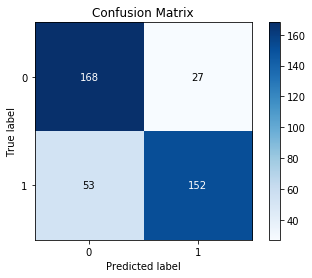

In [71]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

In [85]:
print("Prediction Accuracy : ",accuracy_score(y_test,y_pred)*100,'%')

Prediction Accuracy :  80.0 %


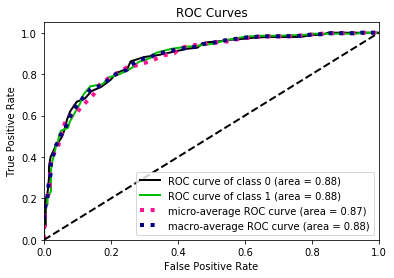

In [73]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

# Hyperparameter Tuning using Random Hyperparameter Grid

In [93]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [94]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42)

In [95]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   7.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   7.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   7.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  32.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  31.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600,

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=  35.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  38.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  37.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  37.7s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1200, m

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 49.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [98]:
optimum_rf = RandomForestClassifier(n_estimators =1200,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=70,bootstrap=False)
optimum_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
opt_pred = optimum_rf.predict(X_test)
opt_pred_proba = optimum_rf.predict_proba(X_test)

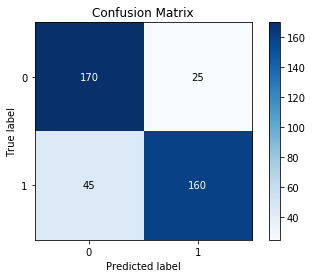

In [100]:
scikitplot.metrics.plot_confusion_matrix(y_test,opt_pred)

In [101]:
print("Accuracy score after hyper parameter tuning : ",accuracy_score(y_test,opt_pred)*100,"%")

Accuracy score after hyper parameter tuning :  82.5 %


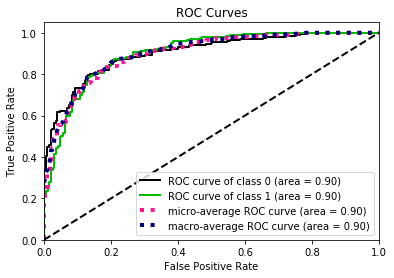

In [102]:
scikitplot.metrics.plot_roc(y_test,opt_pred_proba)

# Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [ ]:
{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [800, 1000,1200,1400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
